# Выпускной проект. Сегментация пользователей по потреблению.

<b>Заказчик:</b> Менеджер банковских продуктов. Банк «Метанпром». 

# Материалы:

<b>Презентация</b> расположена по следующей ссылке: (https://disk.yandex.ru/i/Vc5Qn5yXMAivZQ)

<b>Дашборд Набор №1</b> расположен по ссылке: (https://public.tableau.com/app/profile/oleg.soloschenko/viz/Book1_16871373688290/Dashboard1?publish=yes)

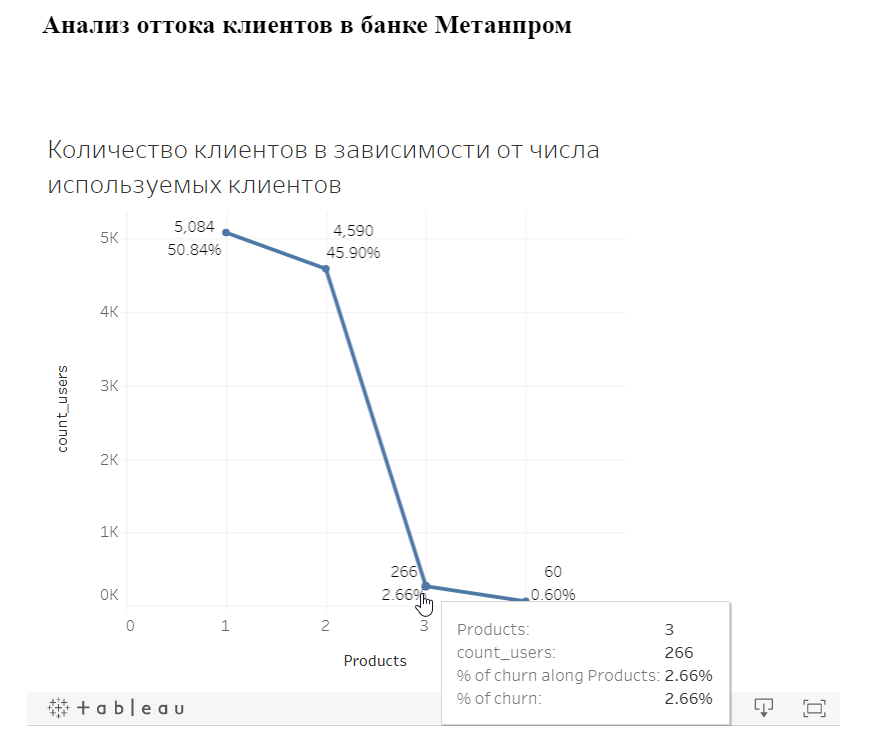

# Цель исследования:

Проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток. Необходимо снизить отток и дать рекомендации по удержанию сегментов.

- Загрузка данных и библиотек,
- Предобработка данных,
- Проведение исследовательского анализа данных,
- Сегментация пользователей на основе данных о количестве потребляемых продуктов,
- Формулировка и проверка статистических гипотез,
- Общие выводы, рекомендации по удержанию сегментов.

    # Ход исследования:
    Данные для анализа я получу из следующего файла:
    
    'https://code.s3.yandex.net/datasets/bank_dataset.csv'
    
   <b>1. Загрузка данных и библиотек.</b>
    
    Для начала я загружу все необходимые для проекта библиотеки и пополню их в ходе работе(при необходимости). Затем загружу сами данные, с которыми будут проводиться работы. Сделаю первичную проверку данных.
    
    <b>2. Предобработка данных.</b>
    
    В данном шаге проведу предобработку данных. Проверю данные на пропуски, на дубликаты и выбросы.
    
    <b>3. Проведение исследовательского анализа данных.</b>
    
    В исследовательском анализе данных проведу уже более детальный анализ, буду искать закономерности в данных, а так же отрисовывать графики по полученным данным.
    
    <b>4. Сегментация пользователей на основе данных о количестве потребляемых продуктов.</b>
    
    На основе проделанной работы займусь сегментацией пользователей основываясь на данных о количестве продуктов. Полученные сегменты можно будет использовать для проверки гипотез.
    
    <b>5. Формулировка и проверка статистических гипотез.</b>
    
    Получив сегменты можно будет приступить к работе с гипотезами. В рамках задачи необходимо проверить две гипотезы, одна дана, вторую сформулировать и проверить самостоятельно.
    
    Первая гиотеза - проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
    
    Вторая гиотеза - сформулирую в рамках выполнения проекта.
    
    <b>6. Общие выводы, рекомендации по удержанию сегментов.</b>
    
    По результату анализа делаю выводы о оттоках и даю рекомендации на основе полученных данных по удержанию клиентов.
    

# Описание данных:

Файл `bank_dataset.csv`:

    - userid — идентификатор пользователя,
    - score — баллы кредитного скоринга,
    - City — город,
    - Gender — пол,
    - Age — возраст,
    - Objects — количество объектов в собственности,
    - Balance — баланс на счёте,
    - Products — количество продуктов, которыми пользуется клиент,
    - CreditCard — есть ли кредитная карта,
    - Loyalty — активный клиент,
    - estimated_salary — заработная плата клиента,
    - Churn — ушёл или нет.
    
    

# 1. Загрузка данных и библиотек.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st
from datetime import datetime, timedelta
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
# ограничение на показ знаков после запятой в выводимых данных
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data.info() #общая информация о датафрейме
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
5,15616748,645,Рыбинск,М,44,8,"113,755.78",2,1,0,"149,756.71",1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1
8,15835101,501,Ярославль,М,44,4,"142,051.07",2,0,1,"74,940.50",0
9,15635125,684,Ярославль,М,27,2,"134,603.88",1,1,1,"71,725.73",0


<b>Комментарий</b>

Проверил типы данных. Они корректны, изменять типы данных не буду.

Так же вижу пропуски в столбце 'balance'. Есть множество предположений по какой причине они могут быть - например нулевой остаток на счёте или же пользователь, который больше не пользуется услугами банка, или отсутствие дебетовой карты банка у клиента и так далее. Но в данном случае я не стал бы заполнять пропуски в балансе, так как адекватно этого сделать не получится и данные могут сильно исказиться, могут появиться выбросы.

In [4]:
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","6,383.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"119,827.49",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"30,095.06",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,"3,768.69",1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,"100,181.98",1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"119,839.69",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"139,512.29",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


<b>Комментарий</b>

Из данных видно следующее:
1) Минимальный возраст клиентов - 18 лет, максимальный же - 92 года, это значит что рассматриваем данные об услугах, предоставляемых с совершеннолетия. А 92 года указывают на то, что в данных продукты могут включать в себя различные пенсионные направления.

2) Не считая нулевой баланс видно, что минимальная сумма на балансе равна - 3768, максимальная же сумма на балансе - 250898.

3) Что интересно, так это столбец с заработной платой, видно из данных, что минимальная заработная плата 11 рублей, максимальная 199992. 11 рублей может показаться неким выбросом, но так как мы не имеем больше данных, можно предположить что это могла быть какая-нибудь выплата, например чаевые за заказ, возврат средств, бонусное начисление и так далее, вариантов много.

# 2. Предобработка данных.

In [5]:
data.rename(columns = {'userid':'user_id', 'City':'city', 'Gender':'gender', 'Age':'age', 'Objects':'objects', 'Balance':'balance', 'Products':'products', 'CreditCard':'credit_card', 'Loyalty':'loyalty', 'Churn':'churn'}, inplace = True )

In [6]:
data.info() #общая информация о датафрейме
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
5,15616748,645,Рыбинск,М,44,8,"113,755.78",2,1,0,"149,756.71",1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1
8,15835101,501,Ярославль,М,44,4,"142,051.07",2,0,1,"74,940.50",0
9,15635125,684,Ярославль,М,27,2,"134,603.88",1,1,1,"71,725.73",0


<b>Комментарий</b>

Заменяю названия столбцов на более правильные, так же соблюдаю правила наименований столбцов, придерживаюсь нижнего регистра.

In [7]:
data.duplicated().sum()

0

In [8]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

<b>Комментарий</b>

В данных 0 явных дубликатов.

Проверил столбец 'city' на правильность написания, так как город могли ввести неправильно и это был бы неявный дубликат, но таких не оказалось, есть всего три наименования.

Больше не вижу столбцов для адекватной проверки на неявные дубликаты.

Так же можно сделать вывод, что чуть более половины клиентов живут в Ярославле.

In [9]:
#Проверка дубликатов в id пользователей
data['user_id'].duplicated().sum()

0

In [10]:
not_id_data = data.iloc [: , 1:]
not_id_data

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0
9996,516,Ярославль,М,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,709,Ярославль,Ж,36,7,NaN,1,0,1,"42,085.58",1
9998,772,Ростов Великий,М,42,3,"75,075.31",2,1,0,"92,888.52",1


In [11]:
not_id_data.duplicated().sum()

0

<p>
<div class="alert-info">
<b>Комментарий</b>

Для полноты картины добавил проверку дубликатов на ид, и проверку дубликатов без столбца с ид - результаты такие же, 0 дубликатов.
</div>

In [12]:
data['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

<b>Комментарий</b>

Проверяю в каком количестве могут быть продукты, и как часто это количество встречается в данных.

In [13]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<b>Комментарий</b>

По общим данным можно сказать, что в отток ушло около 2000 клиентов.

In [14]:
# Проверка данных без баланса
data_null = data[data['balance'].isnull()]

In [15]:
data_null.info()
data_null.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 9997
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           3617 non-null   int64  
 1   score             3617 non-null   int64  
 2   city              3617 non-null   object 
 3   gender            3617 non-null   object 
 4   age               3617 non-null   int64  
 5   objects           3617 non-null   int64  
 6   balance           0 non-null      float64
 7   products          3617 non-null   int64  
 8   credit_card       3617 non-null   int64  
 9   loyalty           3617 non-null   int64  
 10  estimated_salary  3617 non-null   float64
 11  churn             3617 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 367.4+ KB


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,"76,390.01",0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,"26,260.98",0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,"190,857.79",0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,"65,951.65",0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,"14,406.41",0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,"158,684.81",0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,"54,724.03",0


In [16]:
data_null.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"3,617.00","3,617.00","3,617.00","3,617.00",0.00,"3,617.00","3,617.00","3,617.00","3,617.00","3,617.00"
mean,"15,734,685.59",649.45,38.43,5.07,NaN,1.78,0.72,0.52,"98,983.56",0.14
std,"71,947.49",96.16,10.49,2.86,NaN,0.50,0.45,0.50,"57,730.83",0.35
min,"15,608,442.00",350.00,18.00,0.00,NaN,1.00,0.00,0.00,90.07,0.00
25%,"15,672,255.00",583.00,31.00,3.00,NaN,1.00,0.00,0.00,"49,506.82",0.00
50%,"15,736,083.00",651.00,37.00,5.00,NaN,2.00,1.00,1.00,"98,618.79",0.00
75%,"15,796,286.00",717.00,43.00,7.00,NaN,2.00,1.00,1.00,"148,330.97",0.00
max,"15,858,100.00",850.00,88.00,10.00,NaN,4.00,1.00,1.00,"199,992.48",1.00


<b>Комментарий</b>

В данном случае пытаюсь всё же разобраться, есть ли какая то причина в том, что баланса нет.

In [17]:
data_null['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

<b>Комментарий</b>

Как видно из данных - с нулевым балансом присутствуют только города Ярославль и Рыбинск, причем на Ярославль приходится большая часть клиентов без баланса.

Соответственно все клиенты из Ростова имеют баланс.

In [18]:
data_null['products'].value_counts()

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

<b>Комментарий</b>

В продуктах никаких необычных проявлений нет.

In [19]:
data_null['churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

<b>Комментарий</b>

Отток равен 500, что на самом деле меньше, чем ожидалось. То есть отток среди клиентов с нулевым балансом меньше, чем клиентов с плюсовым балансом.

In [20]:
data_null['credit_card'].value_counts()

1    2592
0    1025
Name: credit_card, dtype: int64

<b>Комментарий</b>

Часть теории, о том что у клиентов с нулевым балансом нет дебетовой карты подтвердилась, у большинства пользователей с нулевым балансом - есть кредитные карты.

<b>Вывод</b>


Типы данных не изменял, так как они корректны. Изменил названия столбцов и привел их к нижнему регистру. Проверил данные на дубликаты и они не были выявлены.

Выявил что минимальный возраст клиента - 18 лет, максимальный возраст - 92 года.

Так же обнаружил минимальную зарплату в 11 у.е. но не считаю это за выброс или аномалию.

Изучил столбец баланса и сделал выводы - большинство клиентов без баланса имеют кредитную карту и скорее всего просто напросто не имеют дебетовой карты. Нет ни одного клиента без баланса из Ростова, это значит что либо это технический сбой, либо в данном городе нет таких предложений как в Рыбинске и Ярославле.

# 3. Проведение исследовательского анализа данных.

In [21]:
data.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","6,383.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"119,827.49",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"30,095.06",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,"3,768.69",1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,"100,181.98",1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"119,839.69",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"139,512.29",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


<b>Комментарий</b>

Какие имеем данные:

1) Все клиенты являются уникальными в количестве 10000.

2) Возраст клиентов от 18 до 92 лет.

3) У клиентов может быть 0 объектов недвижимости, а может быть и 10, но среднее количество объектов недвижимости - 5.

4) Изучив что такое скоринг, могу сделать вывод, что средний скоринг в 650 является удовлетворительным для выдачи кредита. Однако в данных есть и минимальный скоринг равный 350, что является уже плохим рейтингом.

5) Все клиенты пользуются продуктами банка, мингимум 1, максимум 4. В среднем у клиентов 1-2 продукта.

6) В среднем клиенты чаще имеют кредитную карту, около 70% клиентов.

7) Активность клиентов в среднем равна 0.5, это значит, что лишь половина клиентов активны.

8) Средний счёт на балансе у клиентов равен примерно 120000, в то время как средний заработок равен 100000.

9) Средний отток равен 20%.



In [22]:
# Средние значения в двух группах, тех кто ушел(1) и тех кто остался(0)
data.groupby('churn').agg('mean').T

churn,0,1
user_id,"15,733,903.88","15,732,787.96"
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,"119,535.86","120,746.97"
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,"99,738.39","101,465.68"


<b>Комментарий</b>

Изучив среднии показатели в двух группах можно увидеть следующую картину:

Группы особо не отличаются между собой. 

Как правило уходит больше клиентов старше 40 лет. В среднем это 44-45 лет.

Остаётся же больше активных клиентов.

Ну и из не особо влиятельных значений - у тех кто остался чуть больше скоринговых баллов. При этом не значительно меньше средняя зарплата и средний баланс.

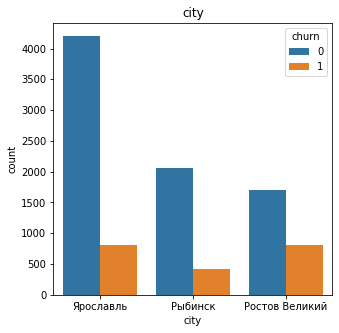

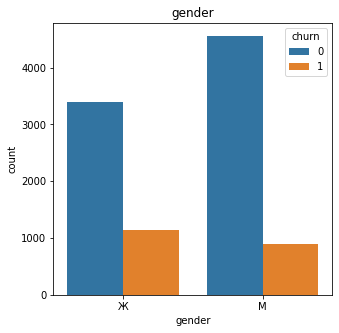

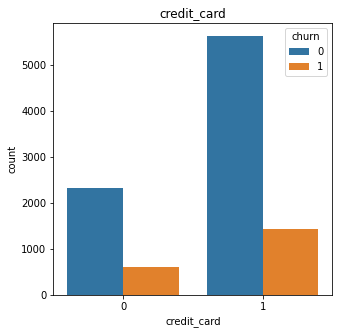

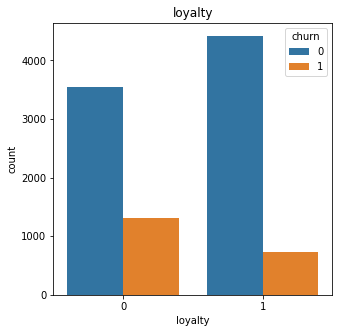

In [23]:
# Категориальные данные
for i in ['city','gender','credit_card','loyalty']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = data[i], hue='churn', data=data)
    plt.title(i)
    plt.show()

<b>Комментарий</b>

Из графиков видно следующие данные:

1) Наибольший отток в Ярославле и в Ростове

2) Отток женщин, не существенно, но больше чем мужчин.

3) Отток клиентов с кредитными картами больше, чем без них.

4) Ну и конечно не активные клиенты попадают в отток в два раза чаще активных.

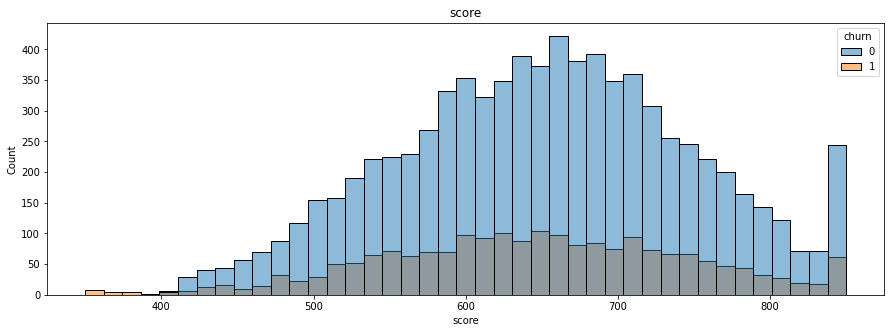

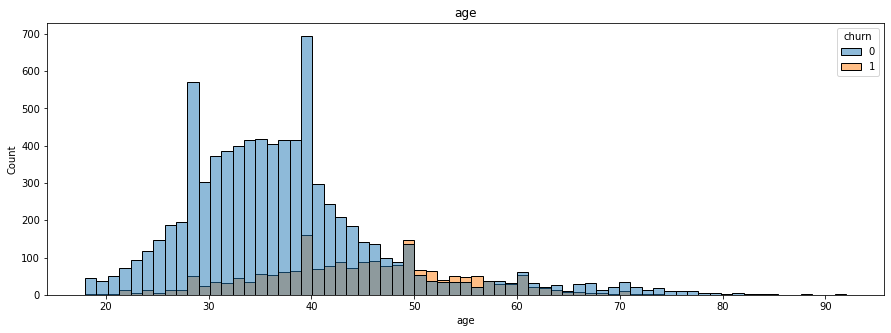

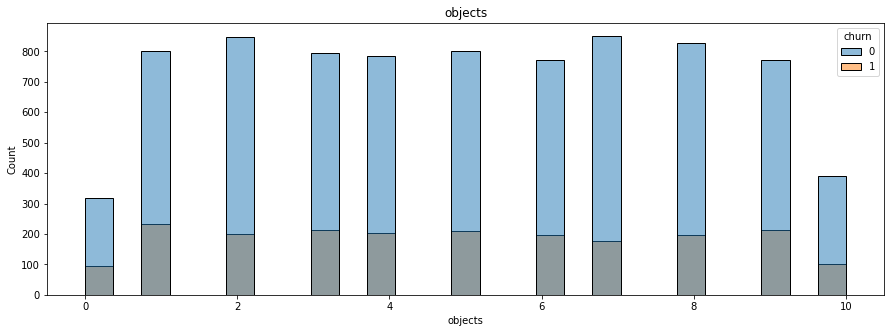

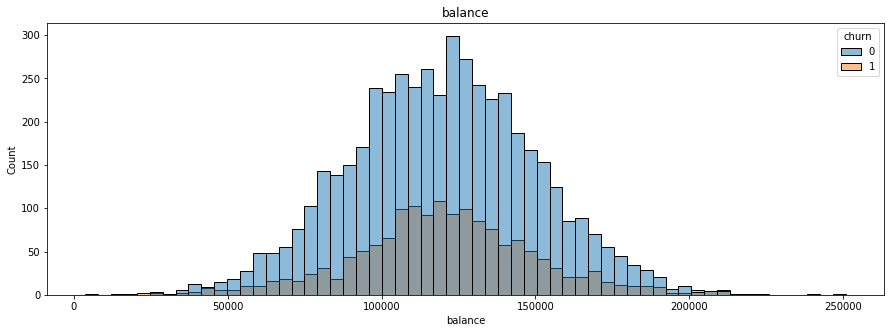

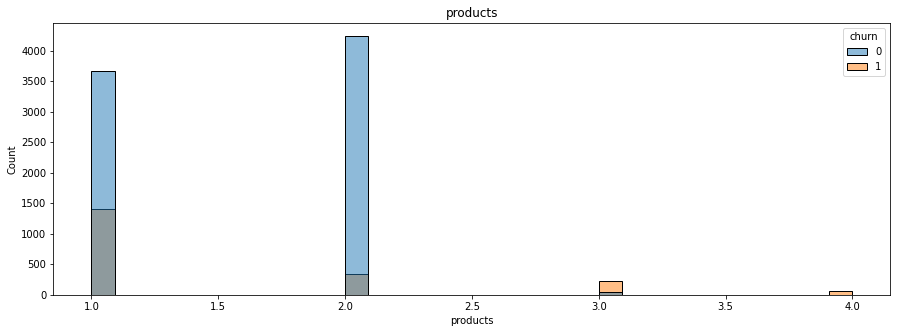

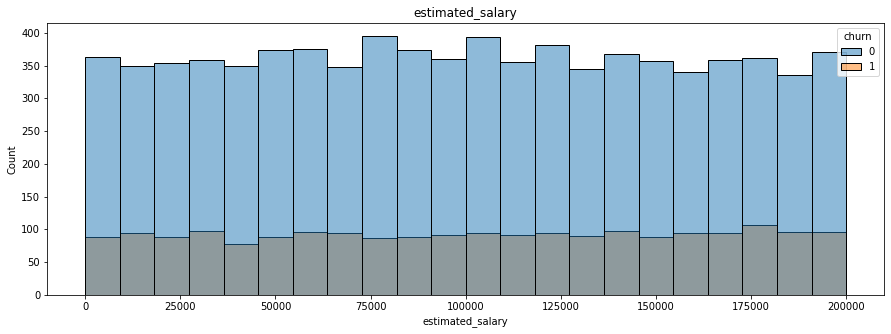

In [24]:
# Количественные данные
for i in ['score', 'age', 'objects', 'balance', 'products', 'estimated_salary']:
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.histplot(x = data[i], hue='churn', data=data)
    plt.title(i)
    plt.show()

<b>Комментарий</b>

Из графиков количественных данных видно следующие данные:

1) У клиентов со скорами 550-750 наблюдается наибольший отток.

2) Если судить по возрасту, то в данную категорию чаще попадают клиенты в возрасте 40-50 лет.

3) Клиенты имеющие 1-9 объектов чаще попадают в отток, но такие данные не очень подходят для анализа.

4) С большим отрывом в оттоке находятся клиенты с балансом 110000-140000

5) Один из важнейших показателей - отток по используемым банковским продуктам. Отток у клиентов с 3 и 4 продуктами очень сильный.

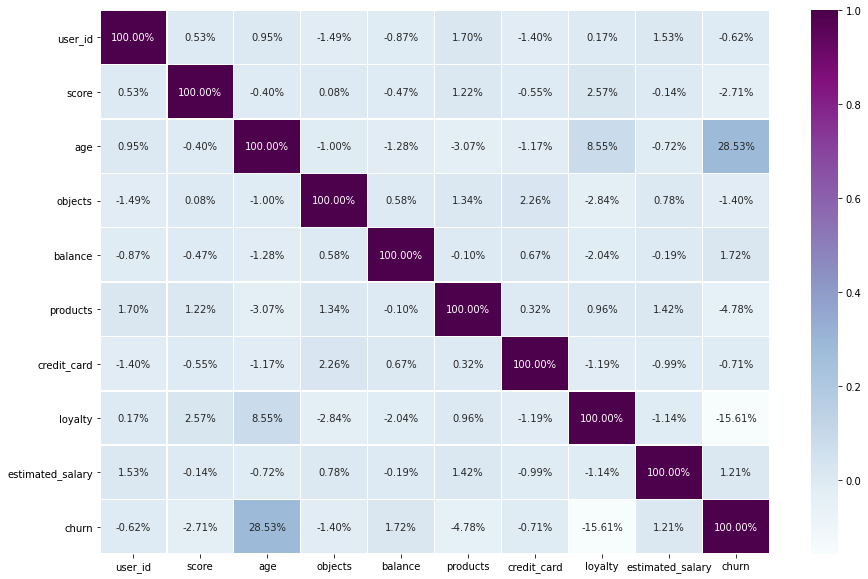

In [25]:
#График корреляции

f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax, cmap='BuPu',fmt='0.2%')
plt.show()

<b>Вывод</b>

По графику корреляции можно сделать вывод, что хоть и незначительно, но больше всего на отток влияет возраст и активность. Возвраст влияет больше на вероятность оттока, чем он выше, тем выше и вероятность. По активности можно сделать вывод, что чем менее активен клиент, тем выше шанс на отток клиента.

Признаков имеющих нулевую корелляция с 'churn' нет. Но моэно сдеать вывод, что такие признаки как кредитные карты, объекты недвижимости, зарплата и баланс практически никак не влияют на отток.


# 4. Сегментация пользователей на основе данных о количестве потребляемых продуктов.

In [26]:
data['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

<b>Комментарий</b>

Ещё раз проверим распределение пользователей по количеству продуктов.

Как видно из полученных данных - большинство клиентов имеют 1 или 2 продукта.

In [27]:
data.groupby('products').agg('mean')

,user_id,score,age,objects,balance,credit_card,loyalty,estimated_salary,churn
products,,,,,,,,,
1,"15,732,367.90",649.12,39.67,4.97,"119,894.16",0.70,0.50,"99,487.26",0.28
2,"15,734,841.49",652.19,37.75,5.05,"119,660.94",0.71,0.53,"100,452.01",0.08
3,"15,741,816.49",648.11,43.20,5.00,"119,475.69",0.71,0.42,"104,318.13",0.83
4,"15,719,361.27",653.58,45.68,5.30,"122,260.61",0.68,0.48,"104,763.72",1.00


<b>Комментарий</b>

Сгруппировав таблицу по продукту и среднему видно отчётливо разницу в оттоках, но и не только в них.

Например Самый большой отток в 100% наблюдается у клиентов с 4 продуктами, но так же не особо отстают показатели оттока клиентов с 3 продуктами - 83%.

Наименьший отток у клиентов с 2 продуктами, всего 8%. На втором месте по наименьшему оттоку являются клиенты с 1 продуктом, отток составляет 28%.

Так же из этой таблицы можно сделать выводы, что чем моложе клиент (40 и младше) - тем ниже вероятность оттока.

Так же можно сакцентировать внимание на активность, чем старше клиент, тем менее он активен и больше вероятность на отток.

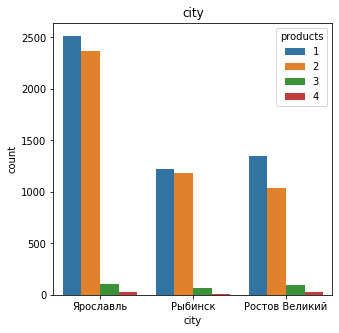

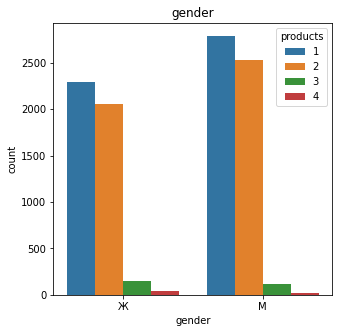

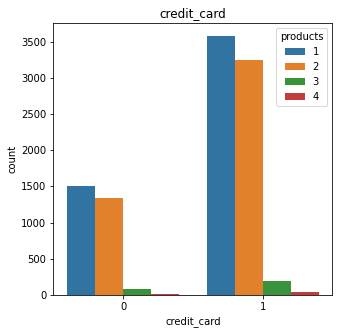

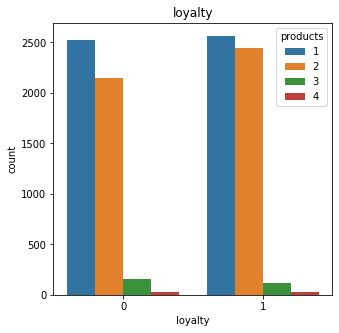

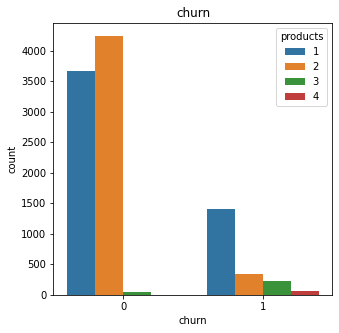

In [28]:
# Категориальные данные по данным продуктов
for i in ['city','gender','credit_card','loyalty', 'churn']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = data[i], hue='products', data=data)
    plt.title(i)
    plt.show()

<b>Комментарий</b>

Визуализировал данные аналогично данным про отток, но за основу взял количество продуктов. Так же поделил на категориальные данные и на количественные данные.

По одному продукту можно сказть следующее - наибольеше количество клиентов с 1 продуктом находятся в Ярославле, мужчин с 1 продуктом больше, чем женщин. Клиентов с 1 продуком имеющих кредитные карты больше всего. А вот по активности количество пользователей с 1 продуктом практически одинаковое значение. 

Клиенты с двумя продуктами имеют очень близкие результаты к клиентам с 1 продуктом. Единственное что выделяется, это активность, она больше чем у клиентов с 1 продуктом. Так же эти клиенты имеют наименьший отток.

Клиенты с тремя продуктами - больше всего в Ярославле и в Ростове, в большей части с тремя продуктами - женщины. Клиенты с тремя продуктами чаще имеют кредитную карту и их активность низкая. Отток практически максимальный, чуть меньше, чем у клиентов с 4 продуктами.

Клиенты с четыремя продуктами - аналогично с клиентами с тремя продуктами, единственное отток ещё больше и поазатели чуть меньше, так как таких клиентов тоже меньше, чем с тремя подуктами.

Далее я буду объединять клиентов с 3 и 4 продуктами, так как их значения крайне близки и их можно олбъединить в одну группу.

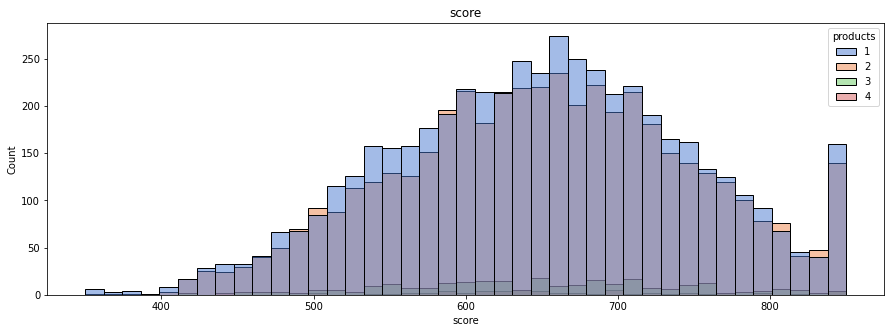

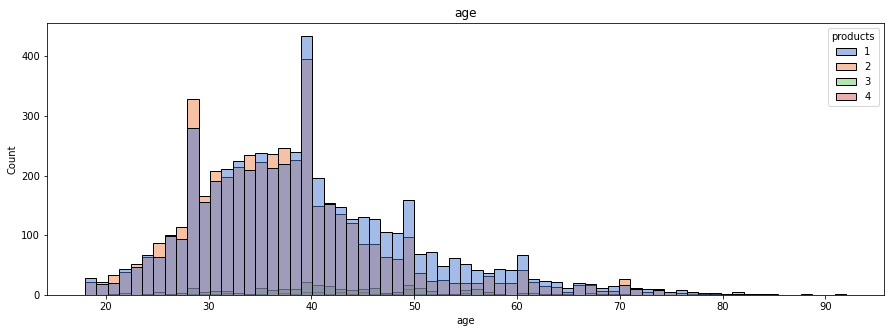

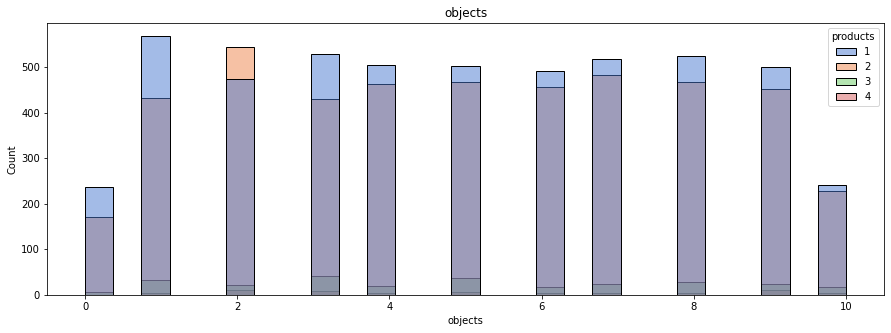

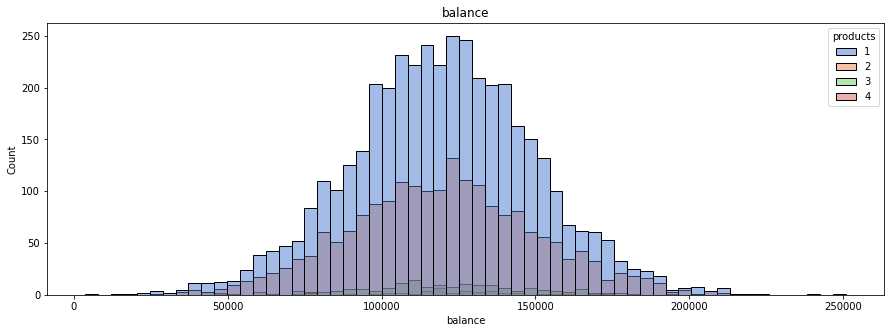

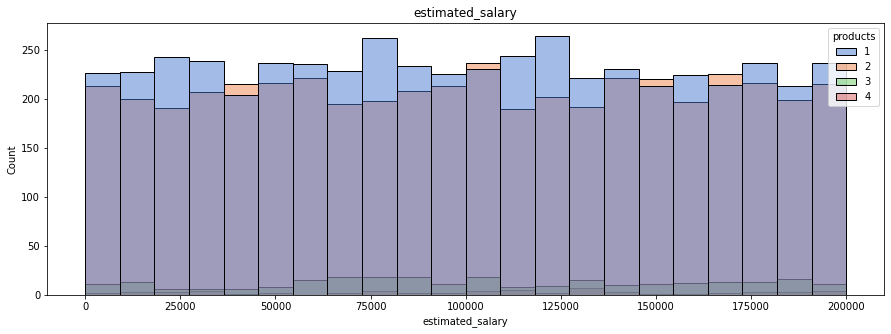

In [29]:
# Количественные данные по данным продуктов
for i in ['score', 'age', 'objects', 'balance', 'estimated_salary']:
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.histplot(x = data[i], hue='products', data=data, palette='muted')
    plt.title(i)
    plt.show()

<b>Комментарий</b>

Приступим к анализу количественных данных.

Итак, рассмотрим показатели клиентов с 1 продуктом, с 2 и объединение 3 и 4 продуктов.

Клиенты с 1 продуктом - имеют больший балл скоринга чем у клиентов с 2 продуктами. Хотя в некоторых моментах клиенты с двумя продуктами выходят вперёд. У данных клиентов наибольший диапозон по возрасту клиентов. По количеству объектов эти клиенты лидируют везде, кроме как в показателе с двумя объектами. Количество клиентов с балансом 100000-150000 вырывается вперёд. По зарплате у клиентов с 1 продуктом почти такие же показатели как у клиентов с двумя продуктами.

Клиенты с 2 продуктами - показатели аналогичны с клиентами у которых 1 продукт, разве что выделяются в нескольких показателях, о которых говорилось ранее.

Клиенты с 3 и 4 продуктами - как видно это более возврастные клиенты 40 лет и более, баллы скоринга ниже чем у клиентов с 1 и 2 продуктами. По остальным показателям так же не выделяются.

<b>Вывод</b>

Из полученнх данных можно сделать выводы и поделить клиентов на группы.

Клиентов я бы по делил на следующие группы:
1) Первая группа - клиенты с одним продуктом.

2) Вторая группа - клиенты с двумя продуктами.

3) Третья группа - клиенты с тремя и четыремя продуктами.

Так же дам краткое описание каждой группе:

<b>Первая группа</b> - это клиенты в основном из Ярославля и это в основном мужчины, имеют чаще всего кредитные карты. Так же в этой группе наибольший диапозон по возрасту клиентов.

<b>Вторая группа</b> - это группа, в которой уже активность больше, чем у клиентов с первой группы, клиенты имеют наименьший отток и в целом показатели близки по показателям к первой группе.

<b>Третья группа</b> - это группа в которую входят женщины, самая низкая активность у этой группы и высокое количество кредитных карт. Так же в данной группе в основном возрастные клиенты от 40 лет и старше и группа имеет наибольший отток.

# 5. Формулировка и проверка статистических гипотез.

# Первая гиотеза - проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


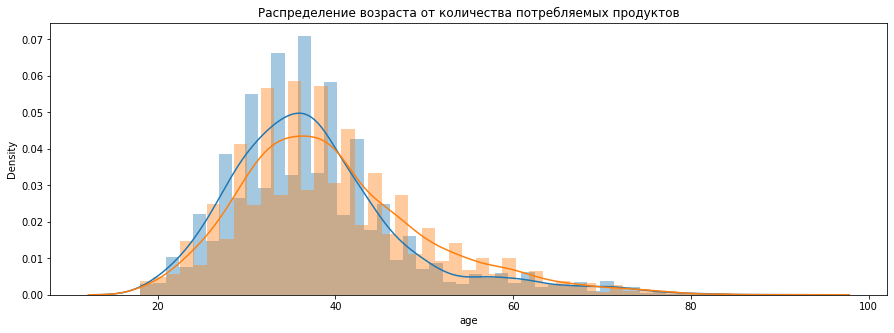

In [30]:
plt.figure(figsize=(15, 5))
sns.distplot(data[data['products'] == 2]['age'])
sns.distplot(data[data['products'] < 2]['age'])
plt.title('Распределение возраста от количества потребляемых продуктов')
plt.show()

<b>Комментарий</b>

По графику видно, что распределение не идеально.

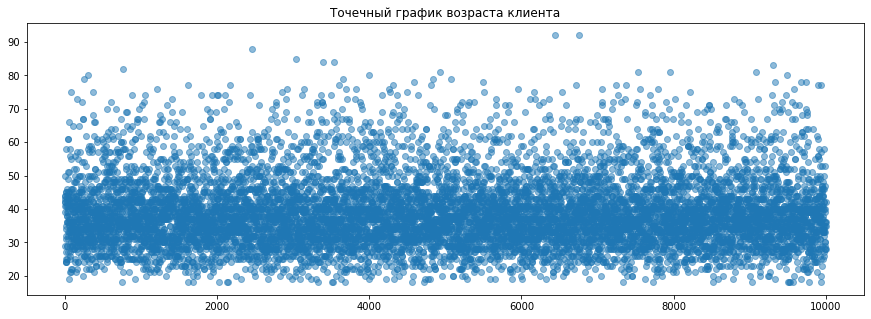

In [31]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(data['age'])))
plt.scatter(x_values, data['age'], alpha=0.5)
plt.title('Точечный график возраста клиента')
plt.show()

<b>Комментарий</b>

Как видно из точечного графика - выбросы есть, но они незначительные и вполне могут быть достоверными.

<b>Комментарий</b>

Для проверки гипотез использую U-критерий (Манна-Уитни) - Данный критерий позволит проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сразу сформулирую гипотезы:

- **Нулевая**:  Возраст клиентов, которые пользуются одним продуктом и клиентов, которые пользуются двумя продуктами - одинаков.
- **Альтернативная**: Возраст клиентов, которые пользуются одним продуктом и клиентов, которые пользуются двумя продуктами - отличаются.

Критический уровень статистической значимости стандартный - alpha = 0.05

In [32]:
alpha = 0.05 

results = st.mannwhitneyu(data[data['products']==2]['age'], data[data['products'] == 1]['age'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя")

p-значение:  1.248185983698308e-22
Отвергаем нулевую гипотезу: разница статистически значима


<b>Комментарий</b>

Гипотеза о том, что возраст между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним одинаков - отвергается, так как разница достаточно большая.

# Вторая гиотеза - проверьте гипотезу различия заработной платы между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


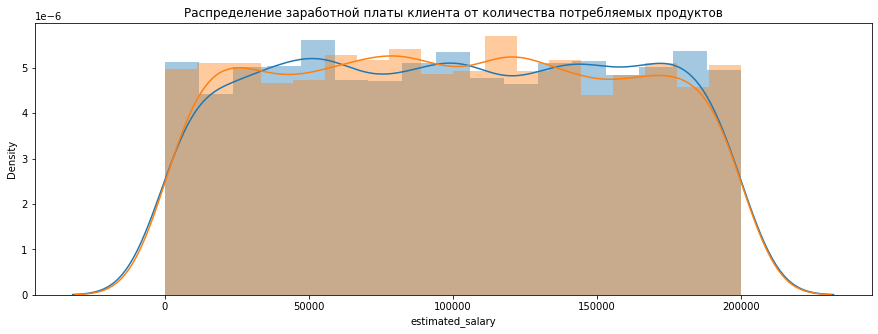

In [33]:
plt.figure(figsize=(15, 5))
sns.distplot(data[data['products'] == 2]['estimated_salary'])
sns.distplot(data[data['products'] < 2]['estimated_salary'])
plt.title('Распределение заработной платы клиента от количества потребляемых продуктов')
plt.show()

<b>Комментарий</b>

В данной гипотезе я решил проверить различия заработной платы между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

По графику уже видна другая картина и здесь распределение близко к нормальному.

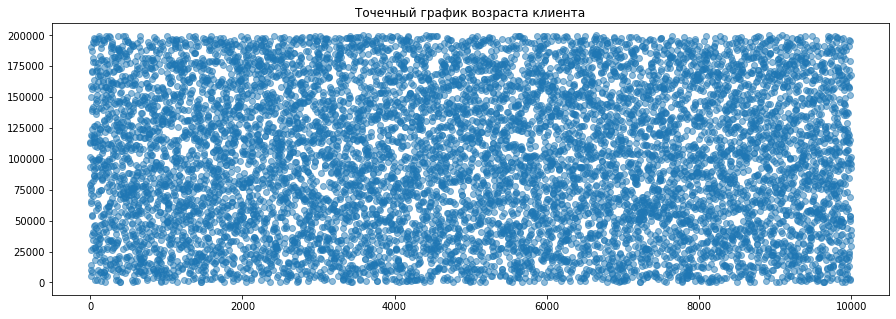

In [34]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(data['estimated_salary'])))
plt.scatter(x_values, data['estimated_salary'], alpha=0.5)
plt.title('Точечный график возраста клиента')
plt.show()

<b>Комментарий</b>

С точечным графиком тоже совсем другая картина - явные выбросы не наблюдаются.

<b>Комментарий</b>

Для проверки гипотез использую U-критерий (Манна-Уитни) - Данный критерий позволит проверить гипотезу различия заработной платы между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сразу сформулирую гипотезы:

- **Нулевая**:  Заработная плата клиентов, которые пользуются одним продуктом и клиентов, которые пользуются двумя продуктами - одинакова.
- **Альтернативная**: Заработная плата клиентов, которые пользуются одним продуктом и клиентов, которые пользуются двумя продуктами - отличается.

Критический уровень статистической значимости стандартный - alpha = 0.05

In [35]:
alpha = 0.05 

results = st.mannwhitneyu(data[data['products']==2]['estimated_salary'], data[data['products'] == 1]['estimated_salary'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя")

p-значение:  0.4079566651927651
Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя


В данной гипотезе уже совсем другой результат. Здесь не получилось отвергнуть гипотезу о разнице заработной платы клиентов между теми клиентами, кто пользуется одним продуктом и теми клиентами, которые пользуются двумя продуктами.

<p>
<div class="alert-info">
<b>Комментарий</b>

Как вариант, можно попробовать использовать ttest для проверки гипотез.
</div>

In [37]:
# Первая гипотеза
alpha = 0.05 

results = st.ttest_ind(data[data['products']==2]['age'], data[data['products'] == 1]['age'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя")

p-значение:  1.730821607368763e-19
Отвергаем нулевую гипотезу: разница статистически значима


In [38]:
# Вторая гипотеза
alpha = 0.05 

results = st.ttest_ind(data[data['products']==2]['estimated_salary'], data[data['products'] == 1]['estimated_salary'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя")

p-значение:  0.41047183624949335
Не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя


<p>
<div class="alert-info">
<b>Комментарий</b>

У первой гипотезы p-значение значительно возросло, что больше закрепляет то, что мы отвергаем нулевую гипотезу.
    
У второй гипотезы результат p-значения особо не изменился.
</div>

# 6. Общие выводы, рекомендации по удержанию сегментов.

В результате данного исследования был произведён анализ датасета `bank_dataset.csv`, который содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Данные даны о 10000 клиентов с уникальными признаками, и выяснили что на всех клиентов приходится 20% оттока.

В ходе работы проводился анализ оттока клиентов. Для начала я загрузил данные, изучил и частично изменил их. Далее провёл предобработку и подошёл к исследовательскому анализу данных, о нём отдельно и поподробнее.

В результате исследовательского анализа данных и сегментации клиентов я пришёл к некоторым выводам и построению потрета трёх сегментов пользователей.

Начну с выводов исследовательского анализа данных:

1) Основные признаки клиентов уходящих в отток:

- Если судить по возрасту, то в данную категорию чаще попадают клиенты в возрасте 40+ лет.
- Наибольший отток в Ростове
- Отток женщин больше, чем мужчин
- Отток клиентво с кредитными картами больше, чем без них
- Не активные клиенты чаще попадают в отток
- Клиенты с 3-4 продуктами попадают в отток, их уровень оттока 83% и 100% соответственно
- Клиенты с балансом свыше 110000 чаще попадают в отток
- У клиентов со скорами ближе к 550 наблюдается наибольший отток.

2) Основные признаки клиентов не уходящих в отток:

- Как правило такие клиенты мужчины
- Возраст младше 40 лет
- Это активные клиенты
- Клиенты с 1-2 продуктами
- Уровень скоринга выше, чем у клиентов чаще уходящих в отток.

И собственно на какие группы были поделены клиенты из полученных данных:

<b>Первая группа</b> - клиенты с одним продуктом. Это клиенты в основном из Ярославля и это в основном мужчины, имеют чаще всего кредитные карты. Так же в этой группе наибольший диапозон по возрасту клиентов.

<b>Вторая группа</b> - клиенты с двумя продуктами. Это группа, в которой уже активность больше, чем у клиентов с первой группы, клиенты имеют наименьший отток и в целом показатели близки по показателям к первой группе.

<b>Третья группа</b> - клиенты с тремя продуктами. Это группа в которую входят женщины, самая низкая активность у этой группы и высокое количество кредитных карт. Так же в данной группе в основном возрастные клиенты от 40 лет и старше и группа имеет наибольший отток.

Дальше я перешёл к проверке гипотез, одна была поставлена в задаче, вторую я сформулировал самостоятельно. Для проверки гипотез был взят U-критерий (Манна-Уитни). Проверил следующие две гипотезы:

- Первая гипотеза - Проверьте гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним
- Вторая гипотеза - Проверьте гипотезу различия заработной платы между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

По итогу, после проверок гипотез получились следующие результаты - Первая гипотеза о том, что возраст между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним одинаков - отвергается, так как разница достаточно большая. 

Вторая же гипотеза была несколько с иными результатами - не получилось отвергнуть гипотезу о разнице заработной платы клиентов между теми клиентами, кто пользуется одним продуктом и теми клиентами, которые пользуются двумя продуктами.


<b>Рекомендации</b>

Здесь сразу стоит обратить внимание на клиентов с большим оттоком и проработать их недостатки. Самый основной признак у клиентов с высоким оттоком - наличие 3-4 продуктов. Далее из важных признаков - к оттоку подвержены женщины и клиенты старше 40 лет. Ну и соответственно, чем клиент менее активен - тем выше шанс на то, что он будет в группе клиентов в оттоке.

Предлагаются следующие рекомендации:

- Важнейшая рекомендация - провести изучение и возможно консультацию клиентам с 3-4 продуктами, так как эти клиенты имеют самый наивысший отток. Так же можно рассмотреть насколько эффективны эти продукты, может их стоит заменить или убрать вовсе. Возможно есть возможность объединить продукты и подавать продукт с несколькими функциями, словно он содержит в себе несколько продуктов.
- Для женщин и пользователей старше 40 лет подготовить более индивидуальные продукты, которые подойдут по их потребностям. Возможно добавить акции или же программы кэшбэка в различные заведения или магазины с уклоном в женскую тематику(Косметика, салон красоты и т.д.).
- Так же можно проработать клиентов из первой группы с одним продуктом, в основном мужчин с возрастом младше 40 лет. Проверить возможность добавить им второй продукт, который привлечёт клиента к активности, так как у клиентов из второй группы с двумя продуктами наименьший уровень оттока.
- У некоторых клиентов в данных о балансе есть пустые значения, предположительно у данных клиентов нет дебетовых карт, необходимо изучть более детально.
- Так же есть клиенты с достаточно небольшим уровнем дохода, но с большим балансом, так же стоит проработать и выяснить по какой причине так получилось.
- Возможно сделать отдельный продукт для пенсионеров, который привлечёт их к пользованию услуг банка, может даже улучшить условия для повышения понимания и соответственно активности у клиентов. Это необходимо, так как отток у данной категории клиентов достаточно большой.